## Introduction
A problem of classifying handwritten digits using a training set of the digits can be solved using
Singular Value Decomposition (SVD). The image of a digit can be represented as a matrix of grayscale
values. Using SVD, this matrix can be decomposed into U, Σ and Vᵀ. The columns of U can be used as
an orthogonal basis for the column subspace of each type of digit. By comparing the residual between
the test digit and U for each type of digit, we can classify the test digit into the type where the residual
is minimum

## Approach and method
This project was completed using Python. The pandas library was used to handle and arrange the
training and test datasets. Numpy and SciPy were used for computations and algorithms. Matplotlib
was used for the plots.
An image can be represented as a matrix. Depending on the properties of this matrix (shape, rank etc.),
a suitable algorithm can be selected to decompose it. Matrix decompostion allows us to use algorithms
to understand or transform the matrix. Matrix decomposition can be performed using QR or SVD. For
some problems, QR maybe be better or more efficient. However for this problem of image
classification, SVD is a more suitable algorithm. Since we have thousands of images for 10 different
digits, the matrices of each digit would have some elements which can be expressed in forms of other
elements. By using SVD, we can find a threshold value for the rank greater than which the computation
cost rises disproportionately compared to the change in accuracy.This makes it quite efficient.
Hence ,in this approach We iterate over each digit and select a matrix comprising the first 400 digit
images. Subsequently, we select the first ( k ) principal basis vectors, which facilitate the representation
of the digit images in a lower-dimensional space. Thereafter we perform Singluar Value Decomposition to obtain matrices U, S and V.

In [ ]:
import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

## Data Preparation
Initially, a DataFrame is created from the training dataset. This DataFrame is then split based on the
labels, and a subset is selected for testing purposes, consisting of the first 400 rows from each digit's
data. For each digit, an input matrix is constructed using the data with the required dimensions.

In [2]:
#Importing training data
train_digits = np.load("data\TrainDigits.npy")
train_labels = np.load("data\TrainLabels.npy")
print(train_digits.shape)
print(train_labels.shape)

(784, 240000)
(1, 240000)


In [3]:
#Converting to dataframe
df = pd.DataFrame({"Digits" :list(train_digits.T), "Labels" :train_labels.flatten()})
#Visualising DF
print(df.head)

<bound method NDFrame.head of                                                    Digits  Labels
0       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       8
1       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       9
2       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       6
3       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       3
4       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       6
...                                                   ...     ...
239995  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       4
239996  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       2
239997  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       1
239998  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       1
239999  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       0

[240000 rows x 2 columns]>


In [4]:
#Splitting into seperate DFs based on label
split = df.groupby(df.Labels)
#Creating a list of all DF's first 400 rows
split_dfs = []
for key, dframe in split:
    new_df = dframe.reset_index(drop = True)
    split_dfs.append(new_df.head(400))

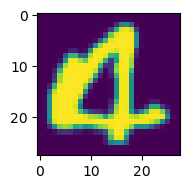

In [5]:
#Visualising random numbers
label = 4
index = 399
img = (split_dfs[label].loc[index, 'Digits'])
def plotter(vector):
    plt.rcParams["figure.figsize"] = [2, 2]
    plt.rcParams["figure.autolayout"] = True
    plt.imshow(vector.reshape(28,28).T, aspect= 'equal')
plotter(img)

In [6]:
#Creating input matrices
input_mats = []
for i in split_dfs:
     input_mats.append(np.stack((i['Digits']), axis = 1))
#Shape of A matrix
print(input_mats[0].shape)

(784, 400)


In [7]:
#Freeing up space for further computation
del df, train_digits, train_labels, split_dfs, split

## Singular Value Decomposition (SVD)
SVD is applied to the matrices representing each digit, and the singular values for each digit are stored
for further analysis. The analysis is specifically focused on digits 3 and 8. The singular value plots for
these digits clearly demonstrate that only a small subset of singular values hold significance, while the
majority are close to zero and can be discarded. This indicates that only a few singular values
contribute meaningfully to representing the data. Further analysis involved plotting the first three
columns of the orthogonal matrix U for digits 3 and 8. These columns visually capture key features of
the digits, particularly the outline, highlighting the fact tha the leading columns of U contain
important information for distinguishing between digits.

In [8]:
#Running SVD on all matrices
n = 10 #Write 10 for full execution
U, V, S = [], [], []
for i in range(n):
    Utemp, Stemp, Vtemp = np.linalg.svd(input_mats[i], full_matrices= True, compute_uv= True)
    U.append(Utemp)
    S.append(Stemp)
    V.append(Vtemp)
#Checking shapes of all three output matrices to see if they fit expectation
print(f"Number of labels for is {len(U)} and shape of one U matrix is {U[0].shape}")
print(f"Shape of S matrices is {S[0].shape}")
print(f"Shape of V matrices is {V[0].shape}")

Number of labels for is 10 and shape of one U matrix is (784, 784)
Shape of S matrices is (400,)
Shape of V matrices is (400, 400)


In [9]:
del input_mats

For training matrices of digits 3 and 8
We compute the SVD and plot the singular values.
plot the first three singular images

C:\Users\Tejaswi S\AppData\Local\Temp\ipykernel_17712\2402788073.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)  # (rows, columns, panel number)


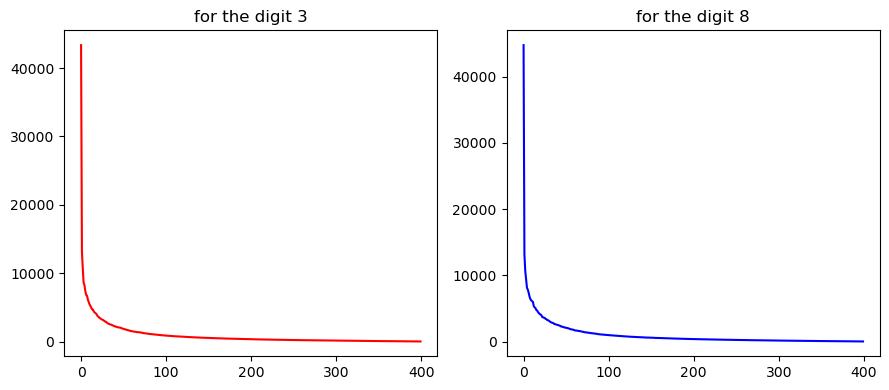

In [10]:
#Plotting singular values vs rank to see where it levels off
plt.figure(figsize=(9, 4))
plt.plot(S[0], 'r.')
# First subplot
plt.subplot(1, 2, 1)  # (rows, columns, panel number)
plt.plot(S[3], 'r-')
plt.title('for the digit 3')

# Second subplot
plt.subplot(1, 2, 2)  # (rows, columns, panel number)
plt.plot(S[8], 'b-')
plt.title('for the digit 8')

plt.tight_layout()
#This plot shows that barely the first 15 values are of any importance to us

We observed that only a limited number of the leading singular values are significantly larger than zero, while the remaining singular values are close to zero. Because of this, we can focus on just the first (k) columns of (U) and (V), along with the first (k) singular values. This lets us create a new matrix that approximates the original image. Essentially, we’re compressing a large matrix into a smaller, more manageable one that still represents the image well

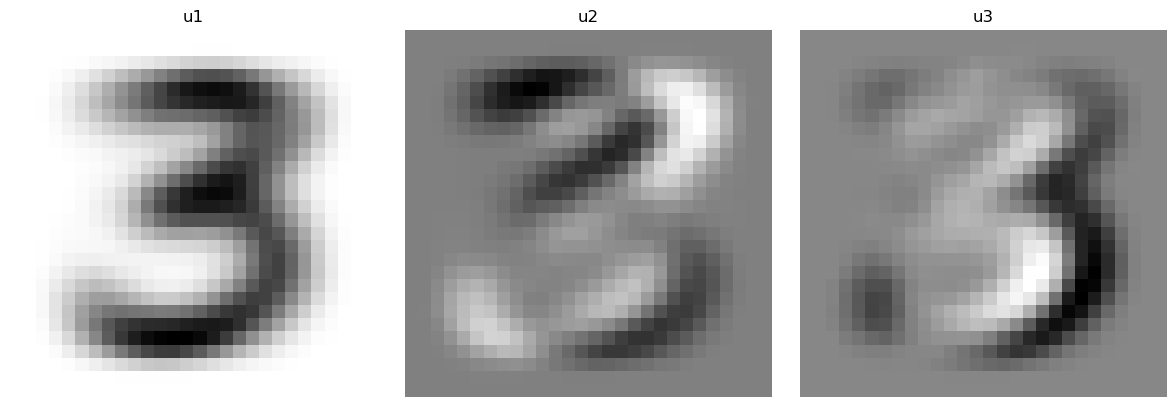

In [11]:
#Plotting u1, u2, u3 for digit 3
First_image_three = U[3][:,0].reshape((28, 28))
Second_image_three = U[3][:,1].reshape((28, 28))
Third_image_three = U[3][:,2].reshape((28, 28))
# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # Adjust figsize as needed

# Plot each image in a subplot
axes[0].imshow(First_image_three.T, cmap='gray', interpolation='none')
axes[0].set_title('u1')
axes[0].axis('off')  # Hide axes

axes[1].imshow(Second_image_three.T, cmap='gray', interpolation='none')
axes[1].set_title('u2')
axes[1].axis('off')  # Hide axes

axes[2].imshow(Third_image_three.T, cmap='gray', interpolation='none')
axes[2].set_title('u3')
axes[2].axis('off')  # Hide axes

# Show the plot
plt.tight_layout()
plt.show()

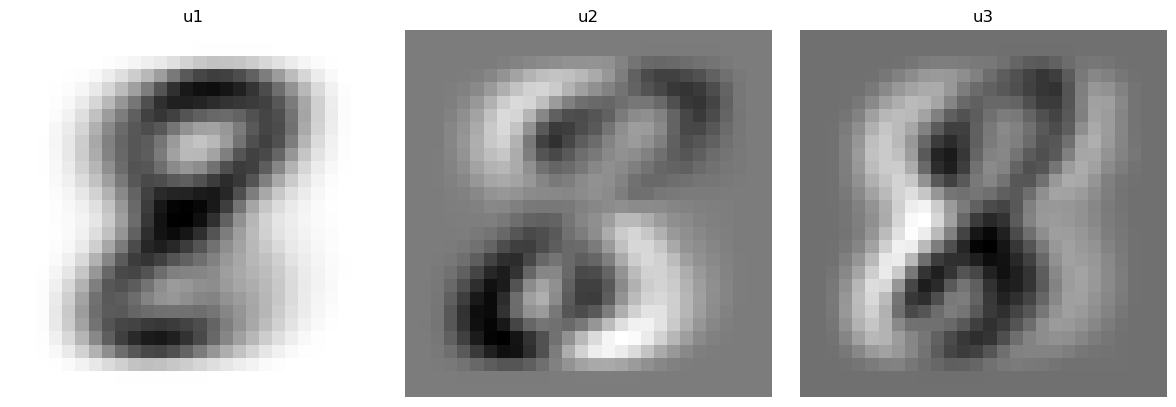

In [12]:
#Plotting u1, u2, u3 for digit 8
First_image_eight = U[8][:,0].reshape((28, 28))
Second_image_eight = U[8][:,1].reshape((28, 28))
Third_image_eight = U[8][:,2].reshape((28, 28))
# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # Adjust figsize as needed

# Plot each image in a subplot
axes[0].imshow(First_image_eight.T, cmap='gray', interpolation='none')
axes[0].set_title('u1')
axes[0].axis('off')  # Hide axes

axes[1].imshow(Second_image_eight.T, cmap='gray', interpolation='none')
axes[1].set_title('u2')
axes[1].axis('off')  # Hide axes

axes[2].imshow(Third_image_eight.T, cmap='gray', interpolation='none')
axes[2].set_title('u3')
axes[2].axis('off')  # Hide axes

# Show the plot
plt.tight_layout()
plt.show()

In line with the above observation, we have plotted the first three singular images for the
digits 3 and 8. These singular images appear to effectively capture the essential features of the digit
images, particularly their outlines and other characteristics. This indicates that these three components
may be sufficient for training purposes, as they represent the key aspects necessary for recognizing
these digits. This may suggest that a reduced representation can still maintain a high level of accuracy
in classification tasks

## Classification and Testing
Using the orthogonal matrix U obtained from the SVD, we train a classification model. However, only
the first k = 15 significant columns of U are used for this purpose, as the singular value plots reveal that
only these columns are significant in representing the data. The remaining columns are negligible and
do not contribute meaningfully to classification. For each test image, residuals are calculated for each
digit. These residuals represent the difference between the actual and predicted data when projected
onto the subspace spanned by the leading k = 15 columns of U. The final classification decision is
made by selecting the index corresponding to the smallest residual for each test image. This approach
allows the model to identify the digit based on the closest match.

In [13]:
#Isolating first k values from graph inference
#For the first computation we will use k = 15
Uk = []
for i in range(10):
    Uk.append((U[i])[:,:15])
print(f"The list Uk consists of {len(Uk)} matrices of shape {Uk[0].shape}")

The list Uk consists of 10 matrices of shape (784, 15)


The overall purpose of this code is to create a list containing the first 15 columns of 10 different
matrices from the original list U.

In [14]:
#Residual computer
def residual(A, B):
    temp = (np.matmul((np.identity(784) - (np.matmul(A, A.T))),B))
    return np.sqrt(np.sum(temp**2, axis = 0))

This code loads test digit images and their corresponding labels from files. It converts the labels to a
Python list for ease of use and checks the dimensions of the loaded test digit array and the length of
the label list to ensure correct data preparation for digit recognition tasks.

In [15]:
#Calculating residuals
test_digits = np.load("data\TestDigits.npy")
test_labels = np.load("data\TestLabels.npy")
residuals = []
for digit in range(10):
    residuals.append(residual(Uk[digit], test_digits))
#Prediction will be index of lowest value across rows of stacked 2D matrix
pred_labels = np.argmin(np.vstack(residuals), axis = 0)

The classifier believes the number is 5 and the number in reality is 5.


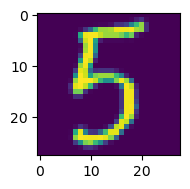

In [21]:
#Visualising random numbers
index = 116
print(f"The classifier believes the number is {pred_labels[index]} and the number in reality is {test_labels[0, index]}.")
plotter(test_digits[:,index])

This code calculates the residuals for each digit (0-9) based on the test digits and stores them in a list.
It then stacks these residuals into a 2D array and determines the predicted labels by finding the index
of the minimum residual for each test digit. This index corresponds to the digit that best fits the test data.

The accuracy of the model across all examples is 0.94695


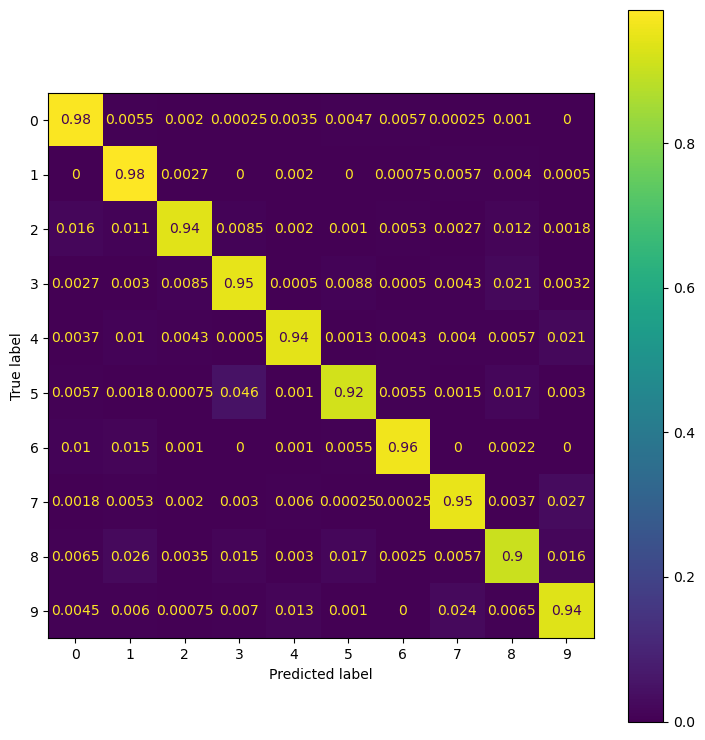

In [ ]:
#Post-processing
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
#Total accuracy
print(f"The accuracy of the model across all examples is {accuracy_score(test_labels, pred_labels)}")
#The digit wise accuracy can be obtained from the classification report
#Size
plt.rcParams["figure.figsize"] = [7.5, 7.5]
#Obtaining confusion matrix
cm = confusion_matrix(test_labels, pred_labels)
#Normalising to get percentages
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#Displaying CM
cf = ConfusionMatrixDisplay(confusion_matrix = cm_normalized)
cf.plot()
plt.show()
#Classification report
report = classification_report(test_labels, pred_labels, output_dict= True)
accurac10 = [report[str(label)]['precision'] for label in range(10)]

The accuracies for k = 15 are very nice, the lowest being for the digit 8 and digit 5. But overall, all of them give great performance with values over 90% each.

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
k_values = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
charter = []
for k in k_values:
    #Creating Uk
    Uk = []
    for i in range(10):
        Uk.append((U[i])[:,:k])
    #Storing predictions
    residuals = []
    for digit in range(10):
        residuals.append(residual(Uk[digit], test_digits))
    pred_label_current = np.argmin(np.vstack(residuals), axis = 0)
    #Storing accuracies
    report = classification_report(test_labels.flatten(), pred_label_current, output_dict=True)
    accuracies = [report[str(label)]['precision'] for label in range(10)]
    charter.append(accuracies)

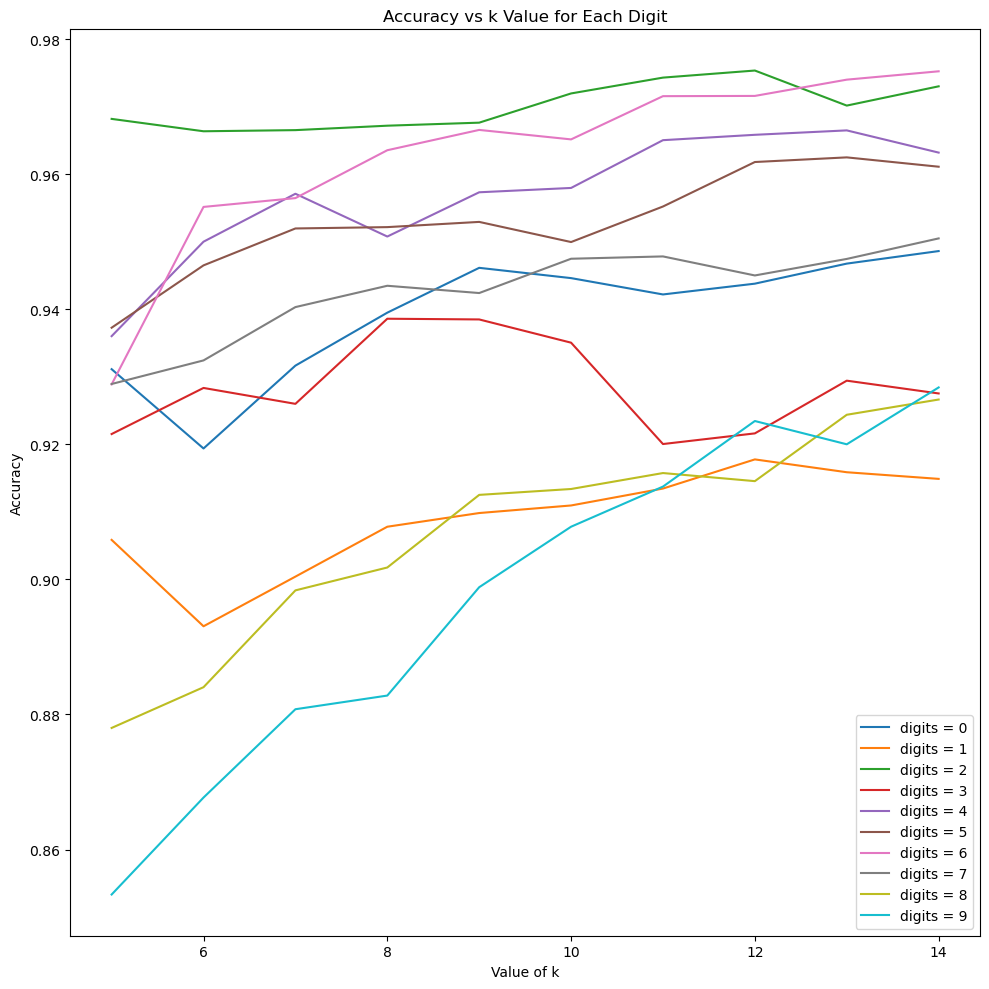

In [28]:
#PLOT FOR ACCURACY VS K VALUE=
plt.figure(figsize=(10,10))
for i in range(10):
    digit_accuracies = [charter[k_idx][i] for k_idx in range(len(k_values))]
    plt.plot(k_values, digit_accuracies, label = f"digits = {i}")
plt.legend()
plt.xlabel("Value of k")
plt.ylabel("Accuracy")
plt.title('Accuracy vs k Value for Each Digit')
plt.show()

In [30]:
#Creating table
table = []
header = ['Digit'] + [f'k={k}' for k in k_values]

for digit in range(10):
    # Create a row with digit and accuracies for each k value
    row = [f'{digit}'] + [f'{accuracy[digit]:.2f}' for accuracy in charter]
    table.append(row)

print(tabulate(table, headers=header, tablefmt='simple', numalign="left"))

Digit    k=5    k=6    k=7    k=8    k=9    k=10    k=11    k=12    k=13    k=14
-------  -----  -----  -----  -----  -----  ------  ------  ------  ------  ------
0        0.93   0.92   0.93   0.94   0.95   0.94    0.94    0.94    0.95    0.95
1        0.91   0.89   0.9    0.91   0.91   0.91    0.91    0.92    0.92    0.91
2        0.97   0.97   0.97   0.97   0.97   0.97    0.97    0.98    0.97    0.97
3        0.92   0.93   0.93   0.94   0.94   0.94    0.92    0.92    0.93    0.93
4        0.94   0.95   0.96   0.95   0.96   0.96    0.97    0.97    0.97    0.96
5        0.94   0.95   0.95   0.95   0.95   0.95    0.96    0.96    0.96    0.96
6        0.93   0.96   0.96   0.96   0.97   0.97    0.97    0.97    0.97    0.98
7        0.93   0.93   0.94   0.94   0.94   0.95    0.95    0.95    0.95    0.95
8        0.88   0.88   0.9    0.9    0.91   0.91    0.92    0.91    0.92    0.93
9        0.85   0.87   0.88   0.88   0.9    0.91    0.91    0.92    0.92    0.93
